### Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


[33.33497576]
[[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
  -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
   2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
  -5.47566338e-01]]


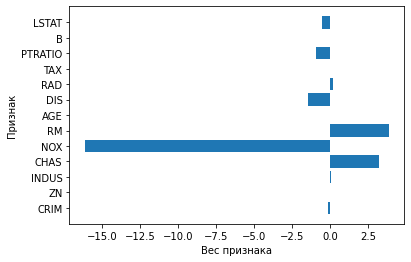

R2=0.7261570836552471


In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

x = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
y_predict = lr.predict(x_test)
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_predict': y_predict.flatten()},
                          columns=['y_test', 'y_predict'])
initial_mse = mean_squared_error(y_test, y_predict)
check_test['error'] = check_test['y_predict'] - check_test['y_test']
print(lr.intercept_)
print(lr.coef_)

plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()
print(f'R2={r2_score(y_test, y_predict)}')

### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [5]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(x_train, y_train.values[:, 0])
y_predict = model.predict(x_test)
print(y_predict.shape, y_test.values[:, 0].shape)
R2 = r2_score(y_test.values[:, 0], y_predict)
print(f'R2={R2}')


(167,) (167,)
R2=0.8664689291628167


#### Вывод касаемо R2:
В первом случае метрика R2 меньше, чем во втором. Соответственно вторая модель лучше первой.